In [96]:
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer

In [44]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [47]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [48]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [49]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


ANALISI SUI MISSING DATA

Molti metodi di Feature engeneering e modelli non riescono a gestire i missing data. Inoltre, la mancanza stessa del dato può essere un'informazione. L'informazione può mancare anche nei valori target ma per ora ci concentreremo solo sulle feature. La letteratura (RUBIN 1976) fornisce una terminologia specifica per classificare le tipologie di missing data:

-) MCAR (missing completely at random) - Caso più auspicabile ma meno frequente. I dati mancano in maniera completamente casuale.
-) MAR (missing at random) - Caso più realistico. I dati mancano in maniera casuale in cluster definiti da altre osservabili.
-) NMAR (not missing at random) - Altro Caso realisto. I dati mancano con un motivo preciso (come ad esempio il vialetto sul set delle case).

In [52]:
#Stampiamo un bel specchietto con il numero totale di missing values e la percentuale rispetto al totale per entrambi i set, e vediamo se hanno la stessa distribuzione
missing_values_table(df_train)

Your selected dataframe has 14 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
CryoSleep,217,2.5
ShoppingMall,208,2.4
VIP,203,2.3
HomePlanet,201,2.3
Name,200,2.3
Cabin,199,2.3
VRDeck,188,2.2
FoodCourt,183,2.1
Spa,183,2.1
Destination,182,2.1


In [53]:
missing_values_table(df_test)

Your selected dataframe has 13 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
FoodCourt,106,2.5
Spa,101,2.4
Cabin,100,2.3
ShoppingMall,98,2.3
Name,94,2.2
CryoSleep,93,2.2
VIP,93,2.2
Destination,92,2.2
Age,91,2.1
HomePlanet,87,2.0


<AxesSubplot:>

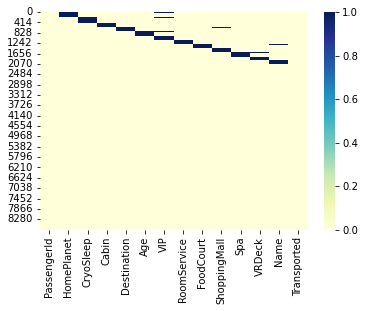

In [54]:
#Ispezioniamo visivamente il dataset per vedere se ci sono correlazioni tra missing values
df_null = df_train.isnull()
sns.heatmap(df_null.sort_values(by=df_null.columns.tolist(),ascending=False).reset_index(drop=True),cmap="YlGnBu")

<AxesSubplot:>

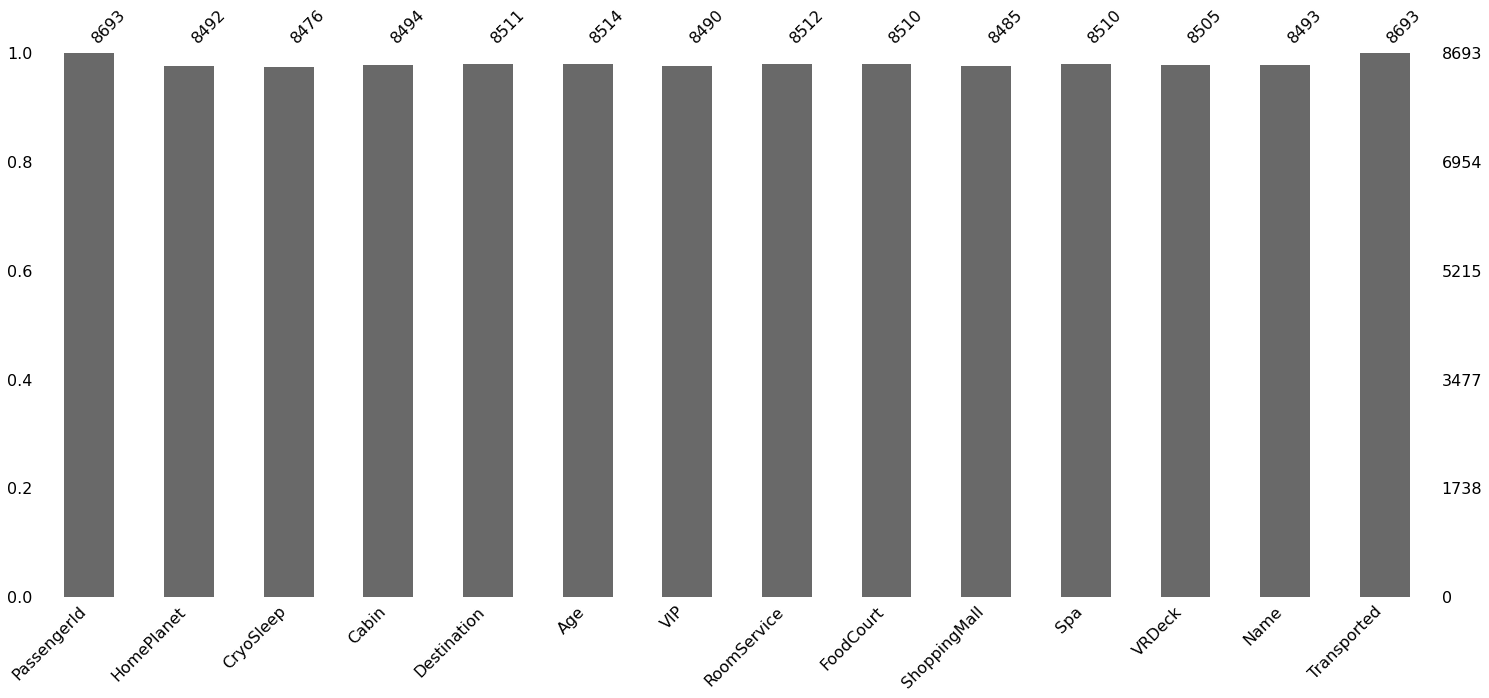

In [58]:
#To graphically analyse the missingness of the data, let's use a library called Missingno It is a package for graphical analysis of missing values. To use this library, we need to import it as follows: import missingno as msno
msno.bar(df_train)

<AxesSubplot:>

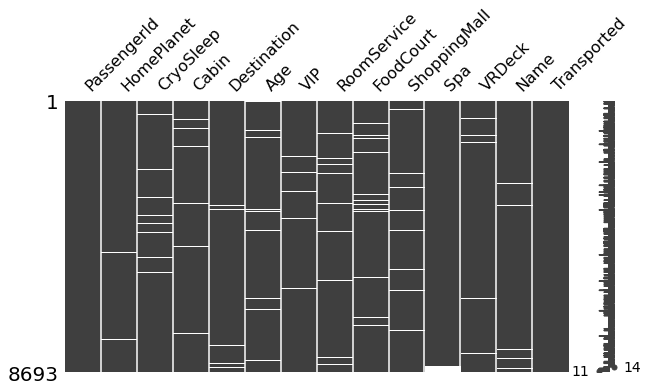

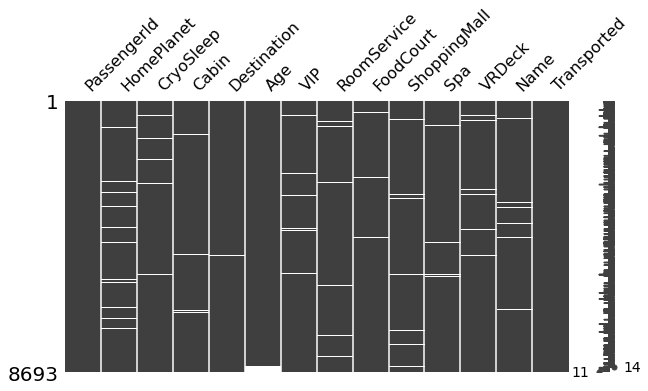

In [69]:
#The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
#Si può anche ordinare per feature per vedere se si osservano pattern
msno.matrix(df_train.sort_values(by=['Spa']),figsize=(10, 5))
msno.matrix(df_train.sort_values(by=['Age']),figsize=(10, 5))

<AxesSubplot:>

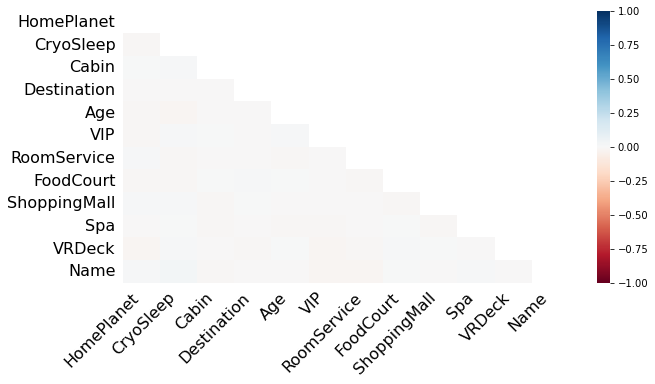

In [71]:
#Altra heatmap dell'utilissimo pacchetto msno, questa volta per la correlazione tra i missing values. Non sembra esserci correlazione.
msno.heatmap(df_train,figsize=(10, 5))

<AxesSubplot:>

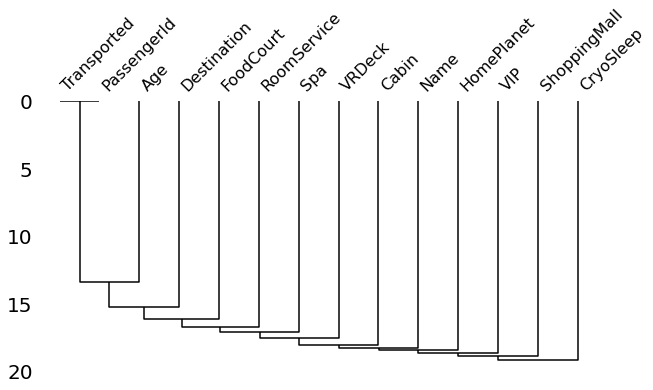

In [73]:
#Vista che raggruppa le varie feature mettendo a fianco quelli più correlati in termini di missing values. Quanmdo sono collegate direttamente si predicono esattamente, altrimenti si clusterizzano a livelli superiori.
msno.dendrogram(df_train,figsize=(10,5))

Una volta individuati i mv e le eventuali correlazioni, vanno trattati. Il metodo più immediato è la cancellazione:
-)Pairwise is explicitly allowing comparisons on rows that have the data you are interested in, even if the row might be defective or missing data in other columns.
-)Listwise Deletion/ Dropping rows - During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.
-)Dropping complete columns - If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

In [80]:
#Drop rows which contains any NaN or missing value in una qualsiasi colonna
train_1 = df_train.dropna(how='any')
print("Numero record eliminati:",len(df_train)-len(train_1),"(",(len(df_train)-len(train_1))/(len(df_train))*100,"%)")

Numero record eliminati: 2087 ( 24.007822385827676 %)


Altro possibilità è quella di completare il dataset imputando le variabili. Per imputare Variabili è possibili utilizzare metodi semplici che utilizzano i dati solo della variabile scelta o metodi più avanzati che fanno uso anche delle altre osservabili.

METODI SEMPLICI

In [103]:
#Si usa un valore unico funzione dei valori della colonna, esempi: una costante, media (solo variabili numeriche), mediana (solo variabili numeriche), valore più frequente

# imputing con media

# da fare solo sulle feature numeriche, ispezioniamo il dataset per decidere quali sono

categorical_columns = []
numeric_columns = []
for c in df_train.columns:
    if df_train[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    elif len(df_train[c].unique())==2:
        categorical_columns.append(c) #anche se è numerico ma a due valori la considero categorica
    else:
        numeric_columns.append(c)


train_constant = df_train[numeric_columns].copy()
mean_imputer = SimpleImputer(strategy='mean') # imputing using mean
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()

train_2 = pd.concat([df_train[categorical_columns], train_constant], axis = 1)

#Le altre variabili le imputo con la moda

mode_imputer = SimpleImputer(strategy='most_frequent') # imputing using mean
train_2.iloc[:,:] = mode_imputer.fit_transform(train_2)

PassengerId     0
HomePlanet      0
Cabin           0
Destination     0
Name            0
Transported     0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [107]:
#Imputo tutto con la moda
train_mode = df_train.copy()
train_mode.iloc[:,:] = mode_imputer.fit_transform(train_mode)
train_3 = train_mode.copy()